In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\data\diabetic_data.csv')


In [3]:
data.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
filtered_data = data[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id',  'admission_source_id',
'payer_code', 'number_diagnoses', 'change', 'diabetesMed', 'readmitted']]
filtered_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,1,?,1,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,7,?,9,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,7,?,6,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,7,?,7,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,7,?,5,Ch,Yes,NO


In [4]:
filtered_data['admission_num'] = filtered_data.groupby('patient_nbr').cumcount() + 1

filtered_data

C:\Users\Nitsan Cooper\AppData\Local\Temp\ipykernel_11868\2957102377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['admission_num'] = filtered_data.groupby('patient_nbr').cumcount() + 1


,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num
0,2278392,8222157,Caucasian,Female,[0-10),6,1,?,1,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),1,7,?,9,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,7,?,6,No,Yes,NO,1
3,500364,82442376,Caucasian,Male,[30-40),1,7,?,7,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,[40-50),1,7,?,5,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,7,MC,9,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,5,MC,9,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,[70-80),1,7,MC,13,Ch,Yes,NO,3
101764,443857166,31693671,Caucasian,Female,[80-90),2,7,MC,9,Ch,Yes,NO,4


In [5]:


# Combine the first two age levels into a single category
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[0-10)', '[10-20)'], '0-20')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[20-30)', '[30-40)'], '20-40')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[40-50)', '[50-60)'], '40-60')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[60-70)', '[70-80)','[80-90)','[90-100)'], '60-100')
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num
0,2278392,8222157,Caucasian,Female,0-20,6,1,?,1,No,No,NO,1
1,149190,55629189,Caucasian,Female,0-20,1,7,?,9,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,20-40,1,7,?,6,No,Yes,NO,1
3,500364,82442376,Caucasian,Male,20-40,1,7,?,7,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,40-60,1,7,?,5,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,60-100,1,7,MC,9,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,60-100,1,5,MC,9,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,60-100,1,7,MC,13,Ch,Yes,NO,3
101764,443857166,31693671,Caucasian,Female,60-100,2,7,MC,9,Ch,Yes,NO,4


In [10]:
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['SP'], 'Self_Pay')
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['MD', 'HM', 'UN', 'CP', 'SI', 'DM', 'CM','CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], 'private_HC')
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['MC','BC'], 'public_HC')
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num
0,2278392,8222157,Caucasian,Female,0-20,6,1,?,1,No,No,NO,1
1,149190,55629189,Caucasian,Female,0-20,1,7,?,9,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,20-40,1,7,?,6,No,Yes,NO,1
3,500364,82442376,Caucasian,Male,20-40,1,7,?,7,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,40-60,1,7,?,5,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,60-100,1,7,public_HC,9,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,60-100,1,5,public_HC,9,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,60-100,1,7,public_HC,13,Ch,Yes,NO,3
101764,443857166,31693671,Caucasian,Female,60-100,2,7,public_HC,9,Ch,Yes,NO,4


In [ ]:
filtered_data['payer_code'].unique()
filtered_data['payer_code'].hist()

<Axes: >

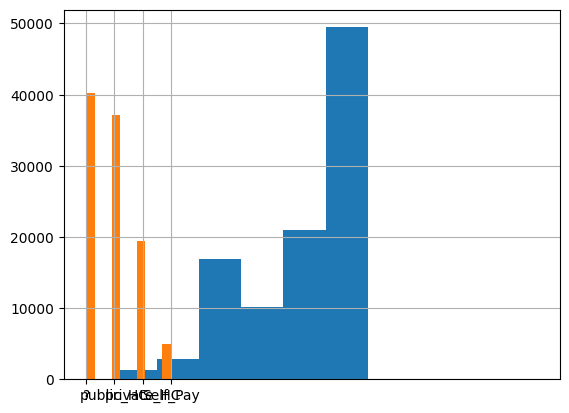

In [20]:
filtered_data['number_diagnoses'].hist()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num,admission_type_id\t
0,2278392,8222157,Caucasian,Female,0-20,Other,1,?,1,No,No,NO,1,6
1,149190,55629189,Caucasian,Female,0-20,Emergency,7,?,9,Ch,Yes,>30,1,1
2,64410,86047875,AfricanAmerican,Female,20-40,Emergency,7,?,6,No,Yes,NO,1,1
3,500364,82442376,Caucasian,Male,20-40,Emergency,7,?,7,Ch,Yes,NO,1,1
4,16680,42519267,Caucasian,Male,40-60,Emergency,7,?,5,Ch,Yes,NO,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,60-100,Emergency,7,public_HC,9,Ch,Yes,>30,2,1
101762,443847782,74694222,AfricanAmerican,Female,60-100,Emergency,5,public_HC,9,No,Yes,NO,2,1
101763,443854148,41088789,Caucasian,Male,60-100,Emergency,7,public_HC,13,Ch,Yes,NO,3,1
101764,443857166,31693671,Caucasian,Female,60-100,Urgent,7,public_HC,9,Ch,Yes,NO,4,2


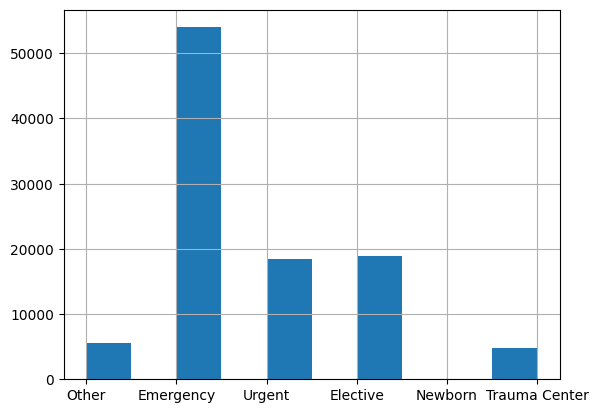

In [27]:
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([1], 'Emergency')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([2], 'Urgent')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([3], 'Elective')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([4], 'Newborn')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([5], 'Trauma Center')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([9], 'Unknown')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([6,7,8], 'Other')
filtered_data['admission_type_id'].hist()
filtered_data


In [36]:

filtered_data.describe(include = ['object', 'int64']
)



,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num,admission_type_id\t
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766,101766.000000,101766,101766,101766,101766.000000,101766.000000
unique,NaN,NaN,6,3,4,6,NaN,4,NaN,2,2,3,NaN,NaN
top,NaN,NaN,Caucasian,Female,60-100,Emergency,NaN,?,NaN,No,Yes,NO,NaN,NaN
freq,NaN,NaN,76099,54708,68541,53990,NaN,40256,NaN,54755,78363,54864,NaN,NaN
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,5.754437,NaN,7.422607,NaN,NaN,NaN,1.629513,2.024006
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,4.064081,NaN,1.933600,NaN,NaN,NaN,1.526402,1.445403
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,1.000000,1.000000
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,7.000000,NaN,8.000000,NaN,NaN,NaN,1.000000,1.000000
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,7.000000,NaN,9.000000,NaN,NaN,NaN,2.000000,3.000000
